In [16]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [17]:
(X_train,y_train) , (X_test,y_test)= keras.datasets.mnist.load_data()

In [18]:
len(X_train)

60000

In [19]:
len(X_test)

10000

In [20]:
X_train[0].shape

(28, 28)

In [21]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

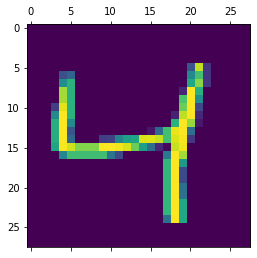

In [22]:
plt.matshow(X_train[2])

In [23]:
y_train[2]

4

In [24]:
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [25]:
X_train=X_train/255
X_test=X_test/255

In [26]:
X_train_flattened=X_train.reshape(len(X_train),28*28)
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_train_flattened
X_test_flattened

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
X_train_flattened.shape

(60000, 784)

In [28]:
X_test_flattened.shape

(10000, 784)

In [29]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 900us/step - loss: 0.6880 - accuracy: 0.8080
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2860 - accuracy: 0.9176
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2269 - accuracy: 0.9339
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1908 - accuracy: 0.9443
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1641 - accuracy: 0.9526
Epoch 6/10
1875/1875 [==============================] - 2s 948us/step - loss: 0.1434 - accuracy: 0.9578
Epoch 7/10
1875/1875 [==============================] - 2s 990us/step - loss: 0.1269 - accuracy: 0.9624
Epoch 8/10
1875/1875 [==============================] - 2s 894us/step - loss: 0.1135 - accuracy: 0.9670
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1024 - accuracy: 0.9698
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - los

In [30]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 747us/step - loss: 0.1059 - accuracy: 0.9685


[0.10590202361345291, 0.968500018119812]

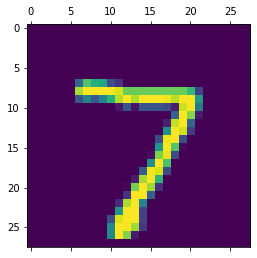

In [31]:
plt.matshow(X_test[0])

In [32]:
y_predicted =model.predict(X_test_flattened)
y_predicted[1]

313/313 [==============================] - 0s 742us/step


array([6.5921628e-01, 9.7798401e-01, 9.9998224e-01, 9.9906248e-01,
       7.3890565e-06, 9.8305768e-01, 4.2379615e-01, 4.9368668e-02,
       7.8293365e-01, 4.2876483e-05], dtype=float32)

In [33]:
np.argmax(y_predicted[1])

2

In [34]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [35]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    1,    0,    0,    2,    4,    2,    2,    0],
       [   0, 1121,    3,    0,    0,    1,    4,    1,    5,    0],
       [   5,    1, 1003,    4,    2,    0,    7,    4,    5,    1],
       [   0,    0,   10,  980,    0,    2,    0,    6,    7,    5],
       [   2,    0,    9,    0,  941,    1,    5,    1,    2,   21],
       [   6,    1,    0,   17,    2,  841,    9,    0,   13,    3],
       [   5,    3,    4,    1,    3,    3,  935,    1,    3,    0],
       [   2,    5,   14,    1,    2,    1,    0,  988,    3,   12],
       [   4,    1,    2,    4,    3,    4,    6,    2,  948,    0],
       [   7,    6,    1,   10,   15,    1,    0,    5,    5,  959]])>

Text(69.0, 0.5, 'Truth')

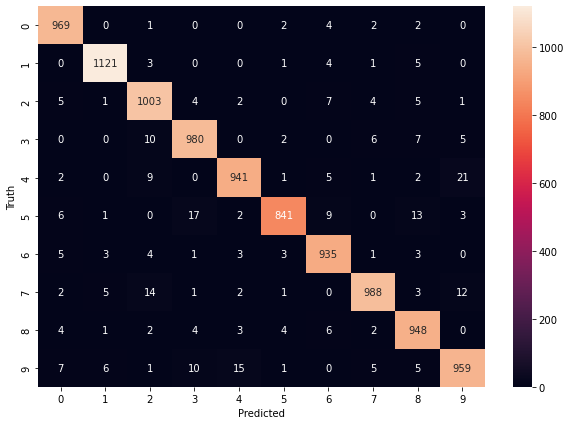

In [36]:

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [37]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=300)

Epoch 1/300
1875/1875 [==============================] - 2s 955us/step - loss: 0.2608 - accuracy: 0.9223
Epoch 2/300
1875/1875 [==============================] - 2s 991us/step - loss: 0.1106 - accuracy: 0.9662
Epoch 3/300
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0779 - accuracy: 0.9751
Epoch 4/300
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0602 - accuracy: 0.9810
Epoch 5/300
1875/1875 [==============================] - 2s 961us/step - loss: 0.0488 - accuracy: 0.9839
Epoch 6/300
1875/1875 [==============================] - 2s 946us/step - loss: 0.0399 - accuracy: 0.9864
Epoch 7/300
1875/1875 [==============================] - 2s 938us/step - loss: 0.0346 - accuracy: 0.9889
Epoch 8/300
1875/1875 [==============================] - 2s 942us/step - loss: 0.0301 - accuracy: 0.9903
Epoch 9/300
1875/1875 [==============================] - 2s 945us/step - loss: 0.0256 - accuracy: 0.9914
Epoch 10/300
1875/1875 [==============================] - 2

1875/1875 [==============================] - 4s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 156/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 157/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0047 - accuracy: 0.9990
Epoch 158/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0049 - accuracy: 0.9991
Epoch 159/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 160/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0047 - accuracy: 0.9991
Epoch 161/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0042 - accuracy: 0.9991
Epoch 162/300
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0081 - accuracy: 0.9989
Epoch 163/300
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 164/300
1875/1875 [==============================] - 4s 2ms/ste

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2287 - accuracy: 0.9333
Epoch 2/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0979 - accuracy: 0.9698
Epoch 3/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0715 - accuracy: 0.9777
Epoch 4/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0547 - accuracy: 0.9827
Epoch 5/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0464 - accuracy: 0.9849
Epoch 6/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0369 - accuracy: 0.9878
Epoch 7/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0284 - accuracy: 0.9908
Epoch 9/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9925
Epoch 10/30
1875/1875 [==============================] - 2s 1ms/step - loss: 0.018

Text(69.0, 0.5, 'Truth')

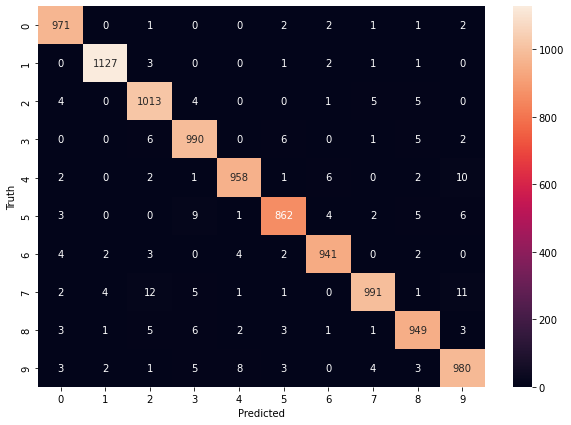

In [53]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='tanh'),
    keras.layers.Dense(50,activation='tanh'),
    keras.layers.Dense(10,activation='sigmoid')
])

tb_call = tf.keras.callbacks.TensorBoard(log_dir='log/',histogram_freq=1    
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


model.fit(X_train_flattened,y_train,epochs=30,callbacks=[tb_call])


y_predicted =model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
model.evaluate(X_test_flattened,y_test)
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

313/313 [==============================] - 0s 996us/step - loss: 0.1019 - accuracy: 0.9798


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    3,    0,    1,    0,    3,    1,    1,    0],
       [   0, 1128,    0,    2,    0,    0,    1,    2,    2,    0],
       [   1,    1, 1011,    6,    3,    0,    2,    6,    1,    1],
       [   0,    1,    1,  994,    0,    4,    0,    4,    3,    3],
       [   1,    0,    3,    0,  968,    1,    3,    3,    0,    3],
       [   3,    0,    1,   10,    3,  861,    8,    3,    3,    0],
       [   1,    2,    1,    1,    1,    2,  946,    0,    4,    0],
       [   1,    4,    7,    2,    2,    0,    0, 1009,    0,    3],
       [   2,    0,    6,    6,    8,    4,    2,    4,  938,    4],
       [   3,    3,    0,    7,   12,    2,    0,    7,    2,  973]])>

Text(69.0, 0.5, 'Truth')

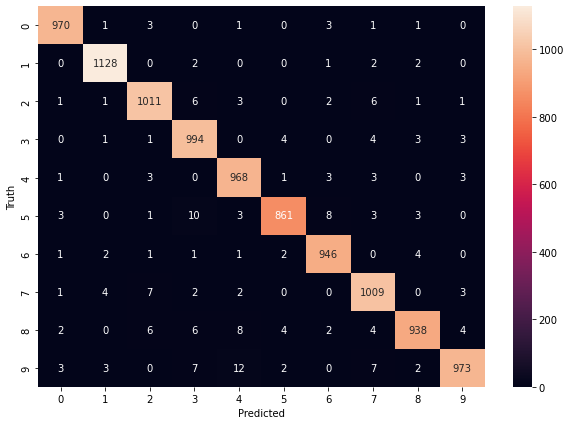

In [40]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [41]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2501 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1143 - accuracy: 0.9668
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0859 - accuracy: 0.9753
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0725 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0618 - accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0541 - accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0480 - accuracy: 0.9873
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0455 - accuracy: 0.9877
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0394 - accuracy: 0.9897
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.037

313/313 [==============================] - 0s 632us/step


Text(69.0, 0.5, 'Truth')

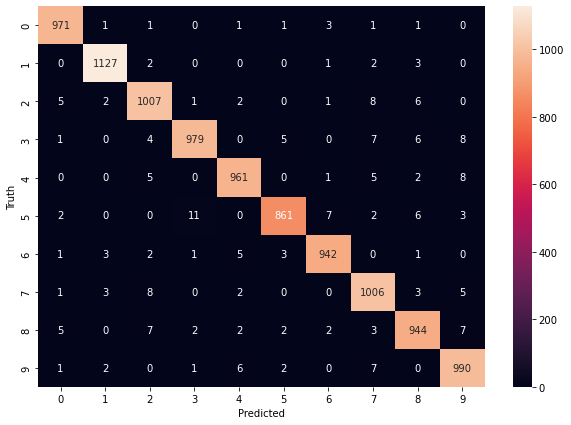

In [42]:
y_predicted =model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Epoch 1/10
1875/1875 [==============================] - 2s 927us/step - loss: 1.4106 - accuracy: 0.6278
Epoch 2/10
1875/1875 [==============================] - 2s 927us/step - loss: 0.5966 - accuracy: 0.8501
Epoch 3/10
1875/1875 [==============================] - 2s 919us/step - loss: 0.4515 - accuracy: 0.8788
Epoch 4/10
1875/1875 [==============================] - 2s 931us/step - loss: 0.3947 - accuracy: 0.8927
Epoch 5/10
1875/1875 [==============================] - 2s 994us/step - loss: 0.3622 - accuracy: 0.9001
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3400 - accuracy: 0.9056
Epoch 7/10
1875/1875 [==============================] - 2s 935us/step - loss: 0.3233 - accuracy: 0.9097
Epoch 8/10
1875/1875 [==============================] - 2s 937us/step - loss: 0.3100 - accuracy: 0.9131
Epoch 9/10
1875/1875 [==============================] - 2s 934us/step - loss: 0.2990 - accuracy: 0.9158
Epoch 10/10
313/313 [==============================] - 0s 650us/st

Text(69.0, 0.5, 'Truth')

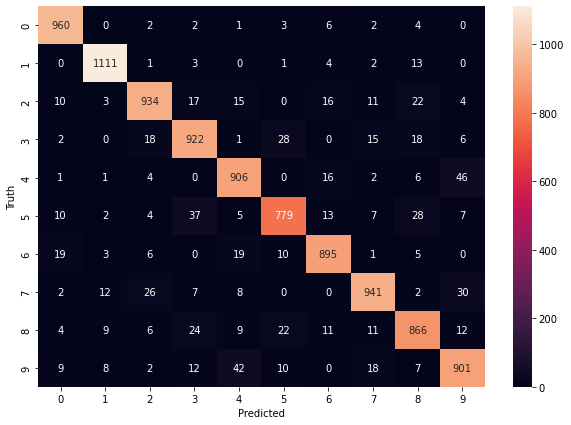

In [43]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='Adagrad',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

y_predicted =model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3150 - accuracy: 0.0873
Epoch 2/10
1875/1875 [==============================] - 2s 992us/step - loss: 2.2488 - accuracy: 0.1732
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1844 - accuracy: 0.2519
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.1142 - accuracy: 0.3054
Epoch 5/10
1875/1875 [==============================] - 2s 1000us/step - loss: 2.0345 - accuracy: 0.3481
Epoch 6/10
1875/1875 [==============================] - 2s 995us/step - loss: 1.9464 - accuracy: 0.3941
Epoch 7/10
1875/1875 [==============================] - 2s 985us/step - loss: 1.8515 - accuracy: 0.4448
Epoch 8/10
1875/1875 [==============================] - 2s 990us/step - loss: 1.7519 - accuracy: 0.4985
Epoch 9/10
1875/1875 [==============================] - 2s 988us/step - loss: 1.6494 - accuracy: 0.5513
Epoch 10/10
313/313 [==============================] - 0s 730us/step 

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    2,    2,    1,    3,    6,    2,    4,    0],
       [   0, 1111,    1,    3,    0,    1,    4,    2,   13,    0],
       [  10,    3,  934,   17,   15,    0,   16,   11,   22,    4],
       [   2,    0,   18,  922,    1,   28,    0,   15,   18,    6],
       [   1,    1,    4,    0,  906,    0,   16,    2,    6,   46],
       [  10,    2,    4,   37,    5,  779,   13,    7,   28,    7],
       [  19,    3,    6,    0,   19,   10,  895,    1,    5,    0],
       [   2,   12,   26,    7,    8,    0,    0,  941,    2,   30],
       [   4,    9,    6,   24,    9,   22,   11,   11,  866,   12],
       [   9,    8,    2,   12,   42,   10,    0,   18,    7,  901]])>

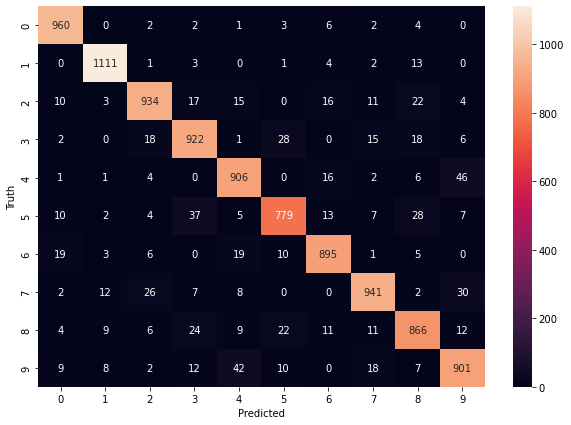

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='Adadelta',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

model.evaluate(X_test_flattened,y_test)
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2506 - accuracy: 0.9255
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1086 - accuracy: 0.9669
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0765 - accuracy: 0.9761
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0616 - accuracy: 0.9811
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0491 - accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0430 - accuracy: 0.9859
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0358 - accuracy: 0.9883
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0318 - accuracy: 0.9898
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9912
Epoch 10/10
313/313 [==============================] - 0s 652us/step


Text(69.0, 0.5, 'Truth')

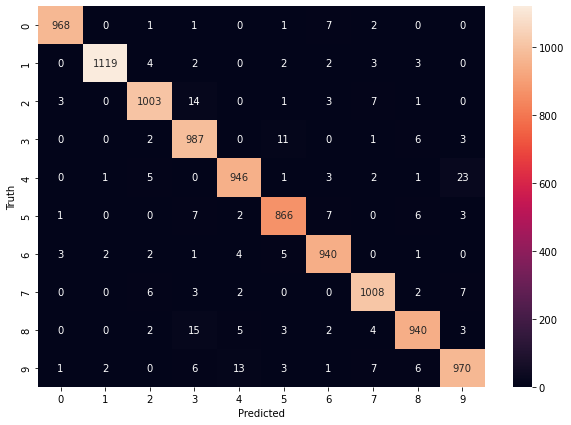

In [45]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)
y_predicted =model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Epoch 1/10
1875/1875 [==============================] - 2s 973us/step - loss: 0.3738 - accuracy: 0.8934
Epoch 2/10
1875/1875 [==============================] - 2s 964us/step - loss: 0.1742 - accuracy: 0.9486
Epoch 3/10
1875/1875 [==============================] - 2s 962us/step - loss: 0.1285 - accuracy: 0.9626
Epoch 4/10
1875/1875 [==============================] - 2s 950us/step - loss: 0.1041 - accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0868 - accuracy: 0.9744
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0733 - accuracy: 0.9780
Epoch 7/10
1875/1875 [==============================] - 2s 960us/step - loss: 0.0639 - accuracy: 0.9810
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0552 - accuracy: 0.9833
Epoch 9/10
1875/1875 [==============================] - 2s 988us/step - loss: 0.0489 - accuracy: 0.9850
Epoch 10/10
313/313 [==============================] - 0s 731us/step -

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    1,    0,    1,    7,    2,    0,    0],
       [   0, 1119,    4,    2,    0,    2,    2,    3,    3,    0],
       [   3,    0, 1003,   14,    0,    1,    3,    7,    1,    0],
       [   0,    0,    2,  987,    0,   11,    0,    1,    6,    3],
       [   0,    1,    5,    0,  946,    1,    3,    2,    1,   23],
       [   1,    0,    0,    7,    2,  866,    7,    0,    6,    3],
       [   3,    2,    2,    1,    4,    5,  940,    0,    1,    0],
       [   0,    0,    6,    3,    2,    0,    0, 1008,    2,    7],
       [   0,    0,    2,   15,    5,    3,    2,    4,  940,    3],
       [   1,    2,    0,    6,   13,    3,    1,    7,    6,  970]])>

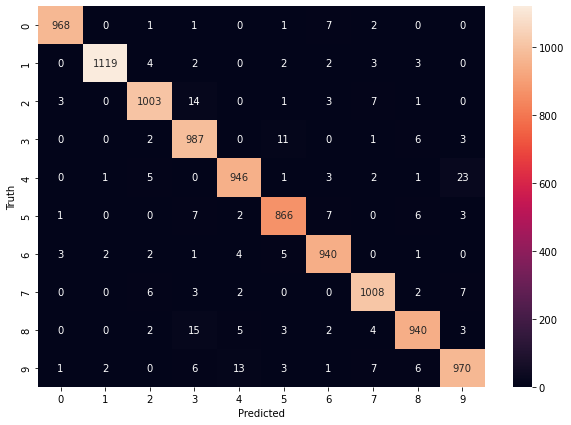

In [46]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='Adamax',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
model.evaluate(X_test_flattened,y_test)
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 2.3024 - accuracy: 0.1118
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3022 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3021 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3020 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3019 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3019 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3018 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3018 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 2.3017 - accuracy: 0.1124
Epoch 10/10
313/313 [==============================] - 0s 748us/step


Text(69.0, 0.5, 'Truth')

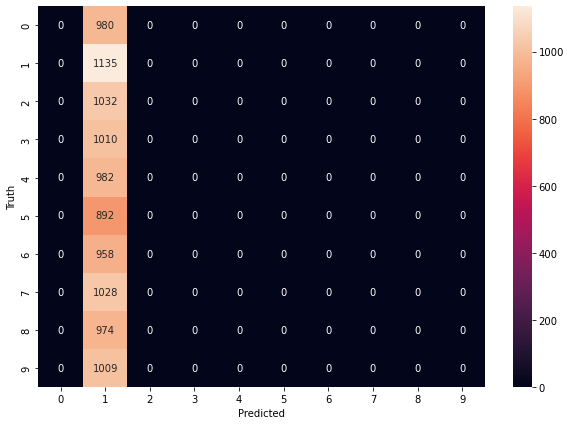

In [47]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,),activation='relu'),
    keras.layers.Dense(75,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])

model.compile(
    optimizer='Ftrl',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train,epochs=10)

y_predicted =model.predict(X_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')